# Working with existing deployments

In [1]:
import os, sys, inspect, json
import skil, skil_client

from skil import Skil, get_service_by_id, Service
from skil import get_experiment_by_id, get_model_by_id, get_workspace_by_id, get_deployment_by_id

# Import modules from parent folder
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir) 

from utils import annotate_image

Using TensorFlow backend.


## Initial SKIL Service

In [2]:
skil_server = Skil(
    host          = 'localhost',
    port          = 9008,
    user_id       = 'admin',
    password      = 'Skymind'
)

'>>> Authenticating SKIL...'
'>>> Done!'


In [3]:
with open('service.json') as FILE:
    config = json.load(FILE)
config

{'deployment_id': '1',
 'experiment_id': 'yolo-experiment-01',
 'model_entity_id': 2,
 'model_id': 'yolo-model-01',
 'model_name': 'yolo-model',
 'workspace_id': '42ec8ddc-0f03-4e5b-8213-b1c639a54d61'}

In [4]:
service = get_service_by_id(
    skil_server,
    config['experiment_id'],
    config['model_id'],
    config['deployment_id']
)

## Run YOLO-v2 Detection Inference

In [6]:
import skil, requests, cv2, json
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Set configurations & temp image
threshold = 0.5
needs_preprocessing = False
image_path = '../images/img-1.jpg'

image = cv2.imread(image_path)

detections = service.detect_objects(image)
print(json.dumps(detections['objects'][0], indent=4, sort_keys=True))

{
    "centerX": 209.0,
    "centerY": 383.0,
    "confidences": [
        0.99962986,
        0.00021992285,
        4.6418525e-05,
        3.8127597e-05,
        1.3651589e-05,
        1.19408905e-05,
        7.193498e-06,
        6.1911906e-06,
        2.4674623e-06,
        1.7361148e-06
    ],
    "height": 280.0,
    "predictedClassNumbers": [
        0,
        56,
        1,
        58,
        60,
        13,
        25,
        26,
        38,
        39
    ],
    "predictedClasses": [
        "person",
        "chair",
        "bicycle",
        "pottedplant",
        "diningtable",
        "bench",
        "umbrella",
        "handbag",
        "tennis racket",
        "bottle"
    ],
    "width": 146.0
}


## Visualize Detections

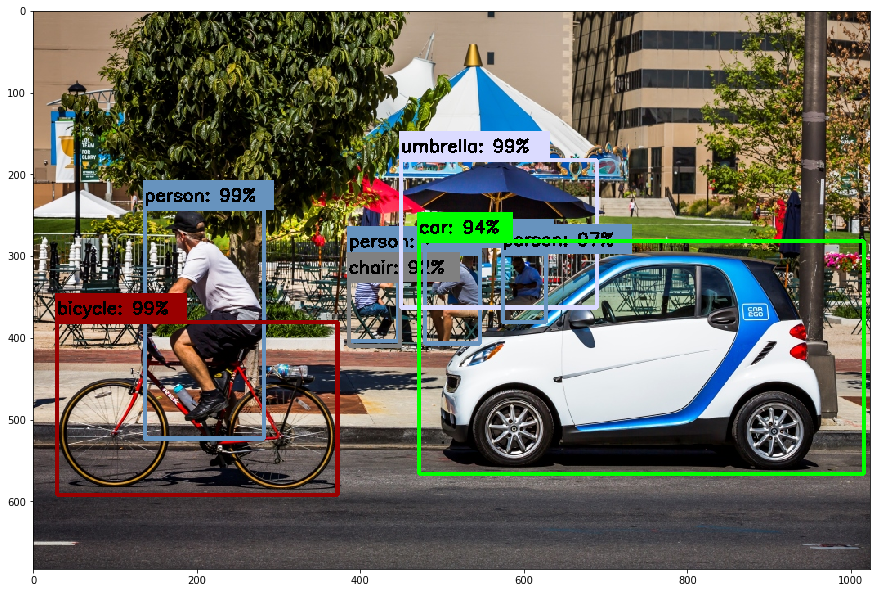

1: [person, 0.99963]
2: [bicycle, 0.99951]
3: [person, 0.97119]
4: [chair, 0.92199]
5: [person, 0.99517]
6: [umbrella, 0.99987]
7: [person, 0.97482]
8: [car, 0.94018]


In [15]:
new_image = annotate_image(image, detections)

cv2.imwrite('annotated.jpg', image)

plt.figure(figsize=(15,15))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

for k, detection in enumerate(detections['objects']):
    predicted = detection['predictedClasses'][0]
    confidence = detection['confidences'][0]
    
    print('{}: [{}, {:.5}]'.format(k+1, predicted, confidence))

## Save Detections

In [8]:
with open('../detections/img-1.json', 'w') as outfile:  
    json.dump(detections, outfile, indent=4, sort_keys=True)